In [ ]:

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, Flatten


11501568/11490434 [==============================] - 0s 0us/step


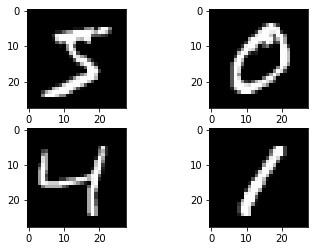

In [ ]:
# Montrer les images du training set
from keras.datasets import mnist
import matplotlib.pyplot as plt
# Téléchargement et répartition en training set et testing set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()


In [ ]:
# initialisation d'un seed aléatoire
seed = 7
np.random.seed(seed)

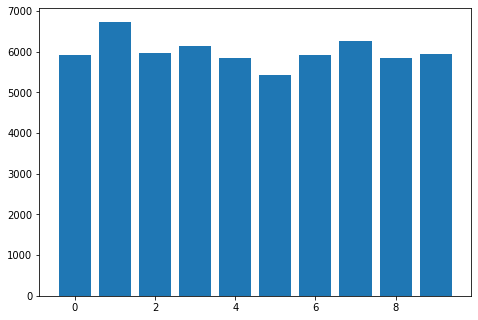

In [ ]:
# Fonction servant à importer les données
def load_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  _X, _Y = [], []

  for k in range(10):
    idx = np.where(y_train == k)[0]
    chunk = idx[np.random.choice(len(idx), size=10, replace=False)]
    _X.append(X_train[chunk])
    _Y.append(y_train[chunk])

  X = np.vstack(_X)
  Y = np.vstack(_Y)

  from sklearn.utils import shuffle
  Y.resize((100,)) #redimensionnement pour prendre 100 données
  X_train, y_train = shuffle(X, Y)
  return X_train, X_test, y_train, y_test

(X_train, y_train), (X_test, y_test) = mnist.load_data()
unique, counts = np.unique(y_train, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique, counts)
plt.show()

# Nous prenons 100 données de MNIST
X_train, X_test, y_train, y_test = load_data()

In [ ]:
# Puisque les images sont de taille 28*28, nous procédons a un applatissement
# afin d'avoir des vecteurs de 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [ ]:
# Normalisation des donneés
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# Utilisation de l'encodage OneHot (représentation binaire)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# baseline
hidden_units = 256
dropout = 0.25

In [ ]:
#Fonction de création du modèle
def mlp_baseline_model():
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels))
  model.add(Activation('relu'))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  model.summary()

  model.compile(loss= 'categorical_crossentropy' , optimizer= 'Adam', metrics=['accuracy' ])
  return model

# Construction du modèle
model = mlp_baseline_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 activation (Activation)     (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Adapter le modèle a nos données
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=10, verbose=2)
# Evaluation dinale du modèle obtenu
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

#Vue sur le modèle
print(model.summary())

Epoch 1/5
10/10 - 4s - loss: 1.9260 - accuracy: 0.4100 - val_loss: 1.3743 - val_accuracy: 0.6249 - 4s/epoch - 400ms/step
Epoch 2/5
10/10 - 3s - loss: 0.7770 - accuracy: 0.8400 - val_loss: 0.9299 - val_accuracy: 0.7337 - 3s/epoch - 259ms/step
Epoch 3/5
10/10 - 3s - loss: 0.3394 - accuracy: 0.9800 - val_loss: 0.8019 - val_accuracy: 0.7594 - 3s/epoch - 259ms/step
Epoch 4/5
10/10 - 3s - loss: 0.1619 - accuracy: 1.0000 - val_loss: 0.7179 - val_accuracy: 0.7780 - 3s/epoch - 259ms/step
Epoch 5/5
10/10 - 3s - loss: 0.0849 - accuracy: 1.0000 - val_loss: 0.7065 - val_accuracy: 0.7692 - 3s/epoch - 259ms/step
Baseline Error: 23.08%
Baseline Accuracy: 76.92%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 activation (Activation)     (None, 784)               0      

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

image_size = X_train.shape[1]
num_classes = y_test.shape[1]


X_train, X_test, y_train, y_test = load_data()


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

image_size = X_train.shape[1]


# redimensionnement pour obtenir la forme [samples][width][height][channels]
X_train = np.reshape(X_train,[-1, image_size, image_size, 1])
X_test = np.reshape(X_test,[-1, image_size, image_size, 1])

# Normalisation
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

In [ ]:
#Création de notre modèle convolutionnel
def cnn_baseline_model():

  model = Sequential()
  model.add(Conv2D(filters=filters,
                   kernel_size=kernel_size,
                   activation='relu',
                   input_shape=input_shape))
  model.add(MaxPooling2D(pool_size))
  model.add(Conv2D(filters=filters,
                   kernel_size=kernel_size,
                   activation='relu'))
  model.add(MaxPooling2D(pool_size))
  model.add(Conv2D(filters=filters,
                   kernel_size=kernel_size,
                   activation='relu'))
  # Ajout du Dropout
  model.add(Dropout(dropout))
  model.add(Flatten())

  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
  return model

# Création du modèle
model = cnn_baseline_model()


model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=2)

#Evaluation du modèle;
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

print(model.summary())
#plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

Epoch 1/10
10/10 - 6s - loss: 2.2917 - accuracy: 0.0800 - val_loss: 2.2112 - val_accuracy: 0.2942 - 6s/epoch - 592ms/step
Epoch 2/10
10/10 - 5s - loss: 2.1365 - accuracy: 0.2900 - val_loss: 2.0132 - val_accuracy: 0.5236 - 5s/epoch - 517ms/step
Epoch 3/10
10/10 - 3s - loss: 1.8505 - accuracy: 0.5400 - val_loss: 1.5573 - val_accuracy: 0.6821 - 3s/epoch - 265ms/step
Epoch 4/10
10/10 - 5s - loss: 1.2627 - accuracy: 0.7500 - val_loss: 1.0342 - val_accuracy: 0.7332 - 5s/epoch - 516ms/step
Epoch 5/10
10/10 - 3s - loss: 0.7838 - accuracy: 0.7300 - val_loss: 0.8296 - val_accuracy: 0.7336 - 3s/epoch - 266ms/step
Epoch 6/10
10/10 - 5s - loss: 0.5314 - accuracy: 0.8600 - val_loss: 0.6970 - val_accuracy: 0.7741 - 5s/epoch - 517ms/step
Epoch 7/10
10/10 - 3s - loss: 0.3267 - accuracy: 0.9000 - val_loss: 0.6946 - val_accuracy: 0.7906 - 3s/epoch - 265ms/step
Epoch 8/10
10/10 - 3s - loss: 0.2890 - accuracy: 0.9000 - val_loss: 0.6265 - val_accuracy: 0.8087 - 3s/epoch - 269ms/step
Epoch 9/10
10/10 - 5s - 

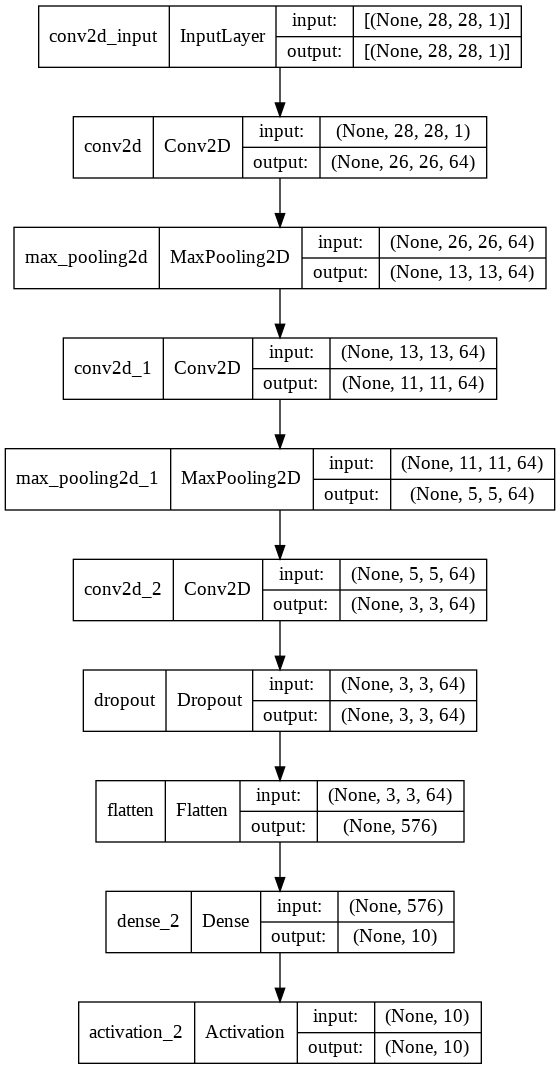

In [ ]:
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



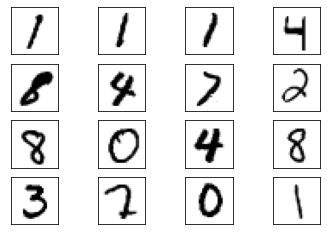

In [ ]:


#Préparation des données
torch.manual_seed(111)

device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])


In [ ]:
#Création du discriminateur
class Discriminator(nn.Module):
  def __init__(self):
         super().__init__()
         self.model = nn.Sequential(
             nn.Linear(784, 1024),
             nn.ReLU(),
             nn.Dropout(0.3),
             nn.Linear(1024, 512),
             nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
  def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

discriminator = Discriminator().to(device=device)

In [ ]:
#Création du générateur
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

In [ ]:
lr = 0.0001  # Choix du taux d'apprentissage
num_epochs = 15 # Nombres d'itération (15 pour optimisation du temps)
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # On fait entrer les données pour entrainer le discriminateur
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Ensuite nous entrainons le discriminateur avec ces donneés
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Le générateur prend les données pour s'entrainer a son tour
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Entrainement du générateur
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # A chaque itération, nous aurons la valeur de l'erreur du discriminateur
        # ainsi que celle du générateur.
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5692477226257324
Epoch: 0 Loss G.: 0.4779079854488373
Epoch: 1 Loss D.: 0.06096680834889412
Epoch: 1 Loss G.: 3.8333747386932373
Epoch: 2 Loss D.: 0.011416684836149216
Epoch: 2 Loss G.: 5.403036594390869
Epoch: 3 Loss D.: 0.04152332618832588
Epoch: 3 Loss G.: 5.134734630584717
Epoch: 4 Loss D.: 0.006647448055446148
Epoch: 4 Loss G.: 6.727372169494629
Epoch: 5 Loss D.: 0.08717642724514008
Epoch: 5 Loss G.: 4.58128547668457
Epoch: 6 Loss D.: 0.1770595908164978
Epoch: 6 Loss G.: 3.0975842475891113
Epoch: 7 Loss D.: 0.06646732240915298
Epoch: 7 Loss G.: 3.1782543659210205
Epoch: 8 Loss D.: 0.16090232133865356
Epoch: 8 Loss G.: 2.8278183937072754
Epoch: 9 Loss D.: 0.4348783791065216
Epoch: 9 Loss G.: 2.3554561138153076
Epoch: 10 Loss D.: 0.3388947546482086
Epoch: 10 Loss G.: 1.9112112522125244
Epoch: 11 Loss D.: 0.38758739829063416
Epoch: 11 Loss G.: 1.5978403091430664
Epoch: 12 Loss D.: 0.2804984450340271
Epoch: 12 Loss G.: 1.3075517416000366
Epoch: 13 Loss D.: 0.288892

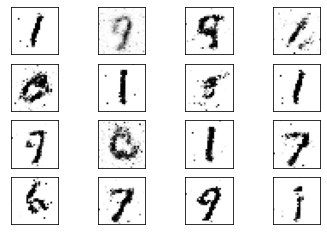

In [ ]:
#Affichage des résultats

generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

#Images générés par le générateur